In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
five = pd.read_csv('collisions_15.csv')
six = pd.read_csv('collisions_16.csv')
seven = pd.read_csv('collisions_17.csv')
eight = pd.read_csv('collisions_18.csv')
five_ = five[['COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'ROAD_SURFACE', 'LIGHTING', 'LATITUDE', 'LONGITUDE', 'CITY','POINT_X', 'POINT_Y', 'COLLISION_SEVERITY']]
six_ = six[['COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'ROAD_SURFACE', 'LIGHTING', 'LATITUDE', 'LONGITUDE', 'CITY','POINT_X', 'POINT_Y', 'COLLISION_SEVERITY']]
seven_ = seven[['COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'ROAD_SURFACE', 'LIGHTING', 'LATITUDE', 'LONGITUDE', 'CITY','POINT_X', 'POINT_Y', 'COLLISION_SEVERITY']]
eight_ = eight[['COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK', 'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'ROAD_SURFACE', 'LIGHTING', 'LATITUDE', 'LONGITUDE', 'CITY','POINT_X', 'POINT_Y', 'COLLISION_SEVERITY']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,15,16,18,27,30,31,34,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,15,16,18,27,30,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
year_dfs = [five_, six_, seven_, eight_]
for year in year_dfs:
    year['WEEKEND'] = np.where((year['DAY_OF_WEEK']==6) | (year['DAY_OF_WEEK']==7), 1, 0)
six_.columns

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['COLLISION_DATE', 'COLLISION_TIME', 'DAY_OF_WEEK', 'WEATHER_1',
       'WEATHER_2', 'STATE_HWY_IND', 'ROAD_SURFACE', 'LIGHTING', 'LATITUDE',
       'LONGITUDE', 'CITY', 'POINT_X', 'POINT_Y', 'COLLISION_SEVERITY',
       'WEEKEND'],
      dtype='object')

In [6]:
def pie_chart(year_df):
    counts = year_df['COLLISION_SEVERITY'].value_counts()
    labels = ['pain', 'visible pain', 'severe injury', 'fatal']
    colors = ['ivory', 'gold', 'darkorange', 'orangered']
    fig1, ax1 = plt.subplots()
    
    def absolute_val(val):
        x = np.round(val/100.*counts.sum(), 0)
        return x
    
    ax1.pie(counts, labels = labels, autopct = absolute_val, colors = colors, shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [7]:
weather = {"A": "Clear", "B": "Cloudy", "C": "Raining", "E": "Fog"}
lighting = {"A": "Daylight", "B": "Dusk - Dawn", "C": "Dark - Street Lights", "D": "Dark - No Street Lights"}
severity = {1: "Fatal", 2: "Severe Injury", 3: "Visible Pain", 4: "No Pain"}

five_ = five_.replace({"WEATHER_1": weather, "LIGHTING": lighting, "COLLISION_SEVERITY": severity})
six_ = six_.replace({"WEATHER_1": weather, "LIGHTING": lighting, "COLLISION_SEVERITY": severity})
seven_ = seven_.replace({"WEATHER_1": weather, "LIGHTING": lighting, "COLLISION_SEVERITY": severity})
eight_ = eight_.replace({"WEATHER_1": weather, "LIGHTING": lighting, "COLLISION_SEVERITY": severity})

In [8]:
sns.set(style="darkgrid")
def make_countplot(year_df, feature, title, order=None):
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.countplot(x=feature, hue = "COLLISION_SEVERITY", palette="Reds_d", data = year_df, ax = ax, order = order).set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Number of accidents')

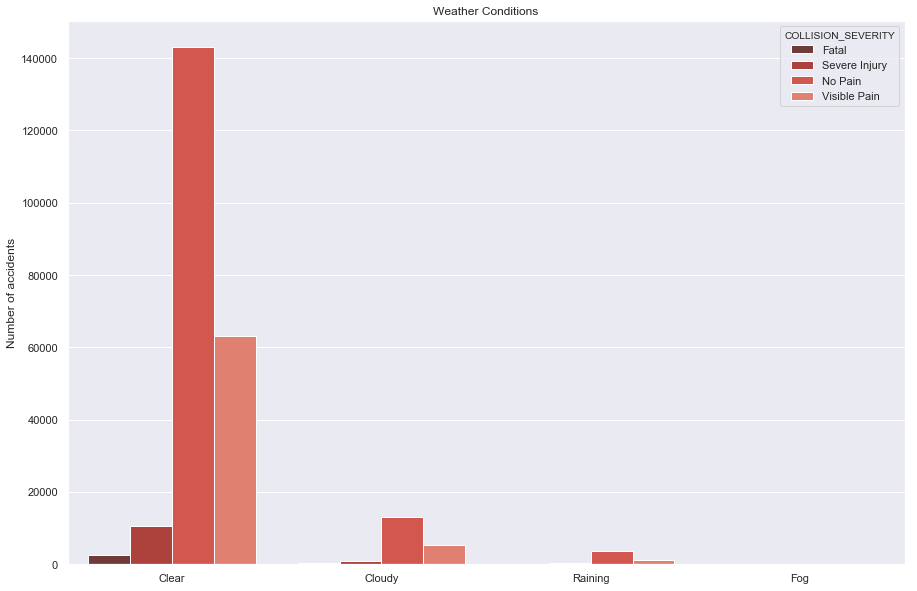

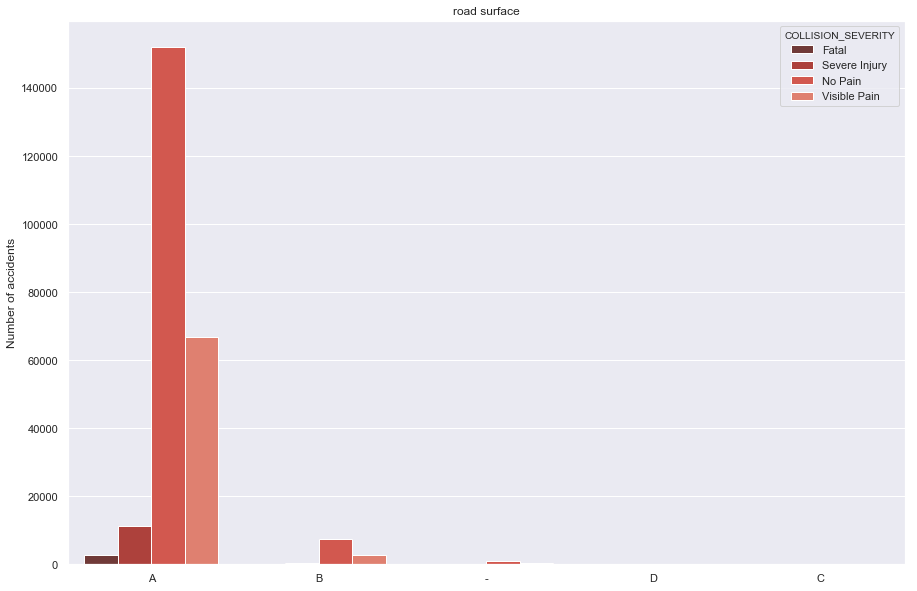

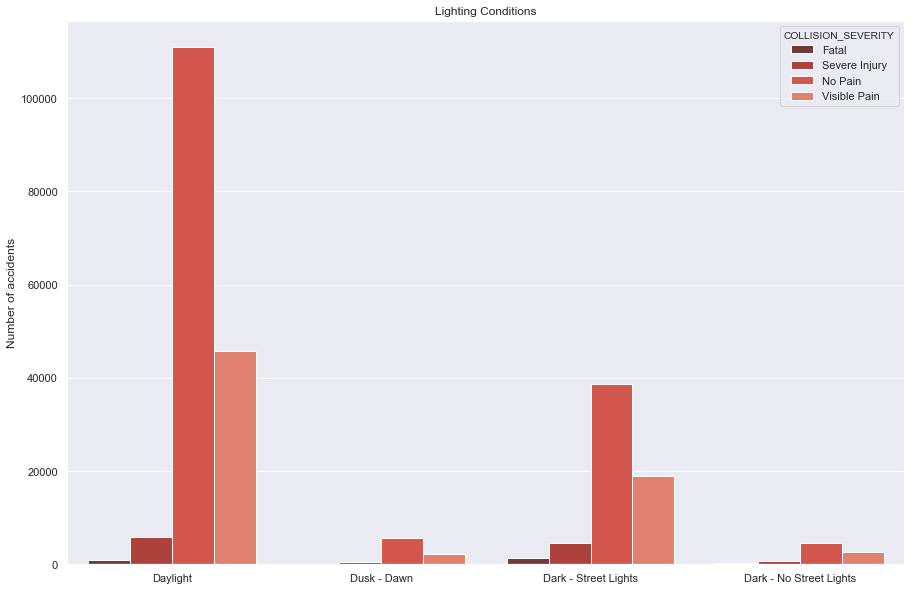

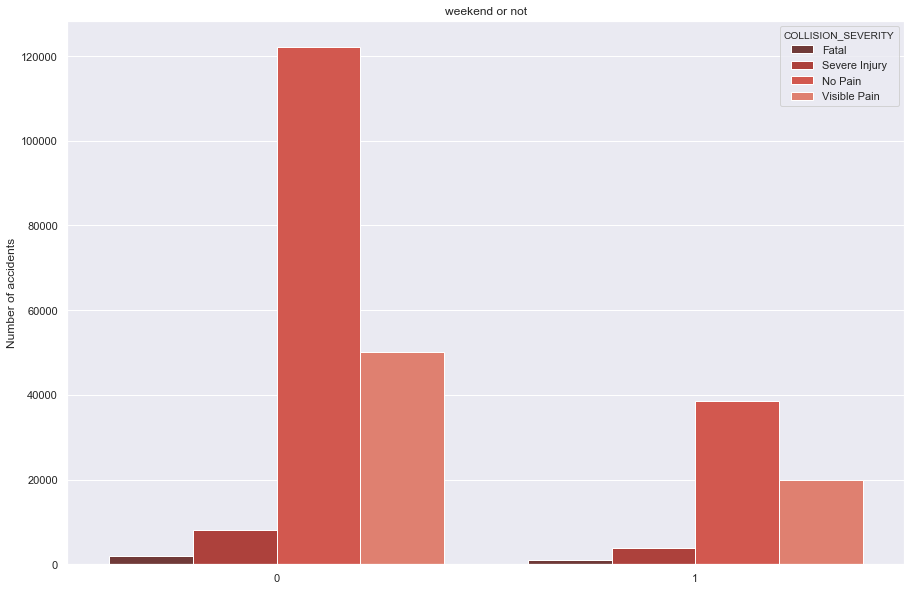

In [9]:
weather_order=["Clear", "Cloudy", "Raining", "Fog"]
lighting_order = ["Daylight", "Dusk - Dawn", "Dark - Street Lights", "Dark - No Street Lights"]
five_ = five_.append(six_).append(seven_).append(eight_)
make_countplot(five_, "WEATHER_1", "Weather Conditions", weather_order)
# make_countplot(five_, "COLLISION_SEVERITY")
make_countplot(five_, "ROAD_SURFACE", "road surface")
make_countplot(five_, "LIGHTING", "Lighting Conditions", lighting_order)
make_countplot(five_, "WEEKEND", "weekend or not")

In [102]:
all_years = five_
print(all_years.shape)
fatal_all = all_years[all_years['COLLISION_SEVERITY'] == "Fatal"]
death = fatal_all.shape[0]
print(fatal_all.shape)

(3701292, 15)
(42364, 15)


In [106]:
weather_counts = fatal_all["WEATHER_1"].value_counts()
weather_percents = [weather_counts['Clear']/death, weather_counts['Cloudy']/death, weather_counts['Raining']/death, weather_counts['Fog']/death]
weather_df = pd.DataFrame({'Weather Condition': ['Clear', 'Cloudy', 'Raining', 'Fog'], 'Percent of Fatal Crashes': weather_percents})

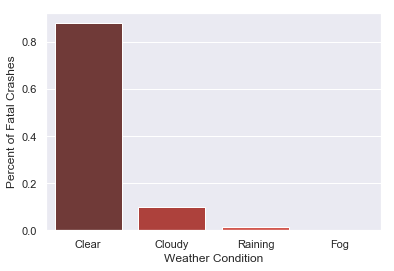

In [107]:
sns.barplot(x='Weather Condition', y = 'Percent of Fatal Crashes', data=weather_df, palette = "Reds_d")

In [108]:
lighting_counts = fatal_all["LIGHTING"].value_counts()
lighting_percents = [lighting_counts['Daylight']/death, lighting_counts["Dusk - Dawn"]/death, lighting_counts["Dark - Street Lights"]/death, lighting_counts["Dark - No Street Lights"]/death]
lighting_df = pd.DataFrame({'Lighting Condition': ['Daylight', 'Dusk - Dawn', 'Dark - Street Lights', 'Dark - No Street Lights'], 'Percent of Fatal Crashes': lighting_percents})


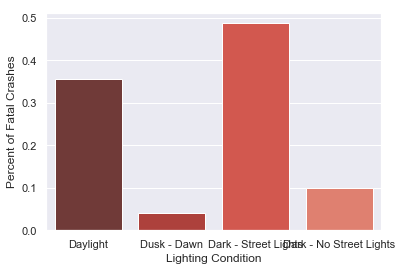

In [109]:
sns.barplot(x='Lighting Condition', y = 'Percent of Fatal Crashes', data=lighting_df, palette = "Reds_d")

In [112]:
weekend_counts = fatal_all["WEEKEND"].value_counts()
weekend_percents = [weekend_counts[0]/death, weekend_counts[1]/death]
weekend_df = pd.DataFrame({'Day of Week': ['Weekday', 'Weekend'], 'Percent of Fatal Crashes': weekend_percents})


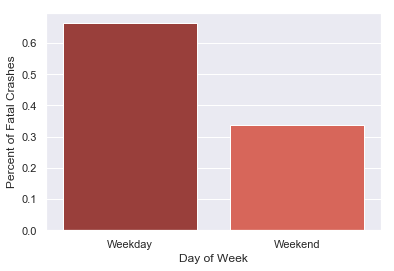

In [114]:
sns.barplot(x='Day of Week', y = 'Percent of Fatal Crashes', data=weekend_df, palette = "Reds_d")